In [1]:
import os 

os.chdir('../')

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import joblib


In [38]:
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('artifacts/data_transformation/train.csv')

print(df.shape)

X = df.drop(columns='categorical__default_yes')
y = df['categorical__default_yes']

Dmodel = DecisionTreeClassifier(criterion = 'gini', max_depth = 6)
Dmodel.fit(X, y)


(750, 36)


DecisionTreeClassifier(max_depth=6)

In [39]:
dfTest = pd.read_csv('artifacts/data_transformation/test.csv')
print(dfTest.shape)
xTest = dfTest.drop(columns = 'categorical__default_yes')

yTest = dfTest.categorical__default_yes


(250, 36)


In [37]:

predictValues = Dmodel.predict(xTest)

accuracy_score(y_pred = predictValues, y_true = yTest)

0.672

In [3]:
model = joblib.load('artifacts/model_trainer/model.joblib')

In [4]:
df = pd.read_csv('artifacts/data_transformation/test.csv')

In [5]:
xTest = df.drop(columns = 'categorical__default_yes')

yTest = df.categorical__default_yes

In [11]:
predictValues = model.predict(xTest)

In [12]:
accuracy_score(y_pred = predictValues, y_true = yTest)

0.672

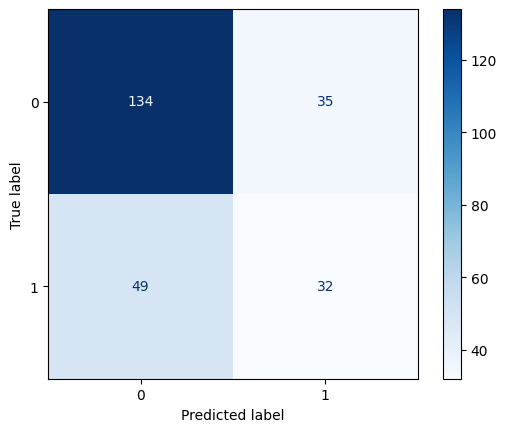

In [69]:
cm = confusion_matrix(y_true=yTest, y_pred=predictValues)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()